# Model benchmarking, performance and settings 

The purpose of this notebook is to show how we can easly retrieve the performance and settings of the pipeline setup using build in functions of the pipeline class.

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
import pandas as pd
import numpy as np
import keras
import sklearn
from sklearn.neural_network import MLPClassifier
import olac

from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Define the pipeline
We first define the pipeline as we would do usually using the following elements:
- data generator
- model
- predictor
- labeller

We then set up the pipeline, and run the it on the data using `pipeline.run()`.

In [13]:
# -- using the roving balls dataset generator
data_generator = olac.data_generators.roving_balls(steps=4000, radius=1)
# -- using the multilayer perceptron classifier from sklearn
model = MLPClassifier((63,32,))
# -- using the online predictor algorithm
predictor = olac.pipeline.OnlinePredictor(verbose=False)
# -- using a simple threshold labeller
labeller = olac.pipeline.ThresholdLabeller(threshold=20, prob=0.8, verbose=False)

# -- Define the pipeline using the above defined elements
pipeline = olac.pipeline.Pipeline(data_generator=data_generator, 
                                  model=model,
                                  predictor=predictor,
                                  labeller=labeller)


Before we run the pipeline, we can use `pipeline.describe()` to retreive the settings on each of the elements we added to the pipeline:

In [14]:
pipeline.describe()

Model:
  neural_network
  multilayer_perceptron
  MLPClassifier

Parameters:  
{ 'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (63, 32),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_iter': 200,
  'momentum': 0.9,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}

Predictor:
  pipeline
  OnlinePredictor

Parameters:  
{'verbose': False}

Labeller:
  pipeline
  ThresholdLabeller

Parameters:  
{'prob': 0.8, 'threshold': 20, 'verbose': False}

Data_generator:
  roving_balls

Generator status:  GEN_CREATED
{'balls': 2,
 'center': (0, 0),
 'period': 1000,
 'radius': 1,
 'steps': 4000,
 'vars': 1}
--------------------------------------------------------------------------------


We then run the pipeline and get the logs during training.

In [15]:
train_set, eval_set = pipeline.run()

After the pipeline has run, we can still retreive the settings that went into the pipeline. The exception to this is the settings of the data generator. Due to the nature of a generator class, after the generator is done the status changes to `CLOSED` and previous settings cannot be retreived.

In [16]:
pipeline.describe()

Model:
  neural_network
  multilayer_perceptron
  MLPClassifier

Parameters:  
{ 'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': (63, 32),
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_iter': 200,
  'momentum': 0.9,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': None,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False}

Predictor:
  pipeline
  OnlinePredictor

Parameters:  
{'verbose': False}

Labeller:
  pipeline
  ThresholdLabeller

Parameters:  
{'prob': 0.8, 'threshold': 20, 'verbose': False}

Data_generator:
  roving_balls

Generator status:  GEN_CLOSED
{}
--------------------------------------------------------------------------------


## Performance
To gain insight into the performance of the pipeline we can use the performance function in the vis module of the olac package. This provides the user with an overview of the observed vs unobserved accuracy, precision, recall, TPR and TNR. Here, observed performance is defined as the performance one would be able to measure in production. Meaning, the perfomance indicators measured on the labelled datapoints.
Unobserver is thus the performance indicators measured on the not labelled datapoints. Ideally, we would want the performance of both the observed and unobserved to be close together so we know the observer precision is a good indicator of the actual performance of the model.

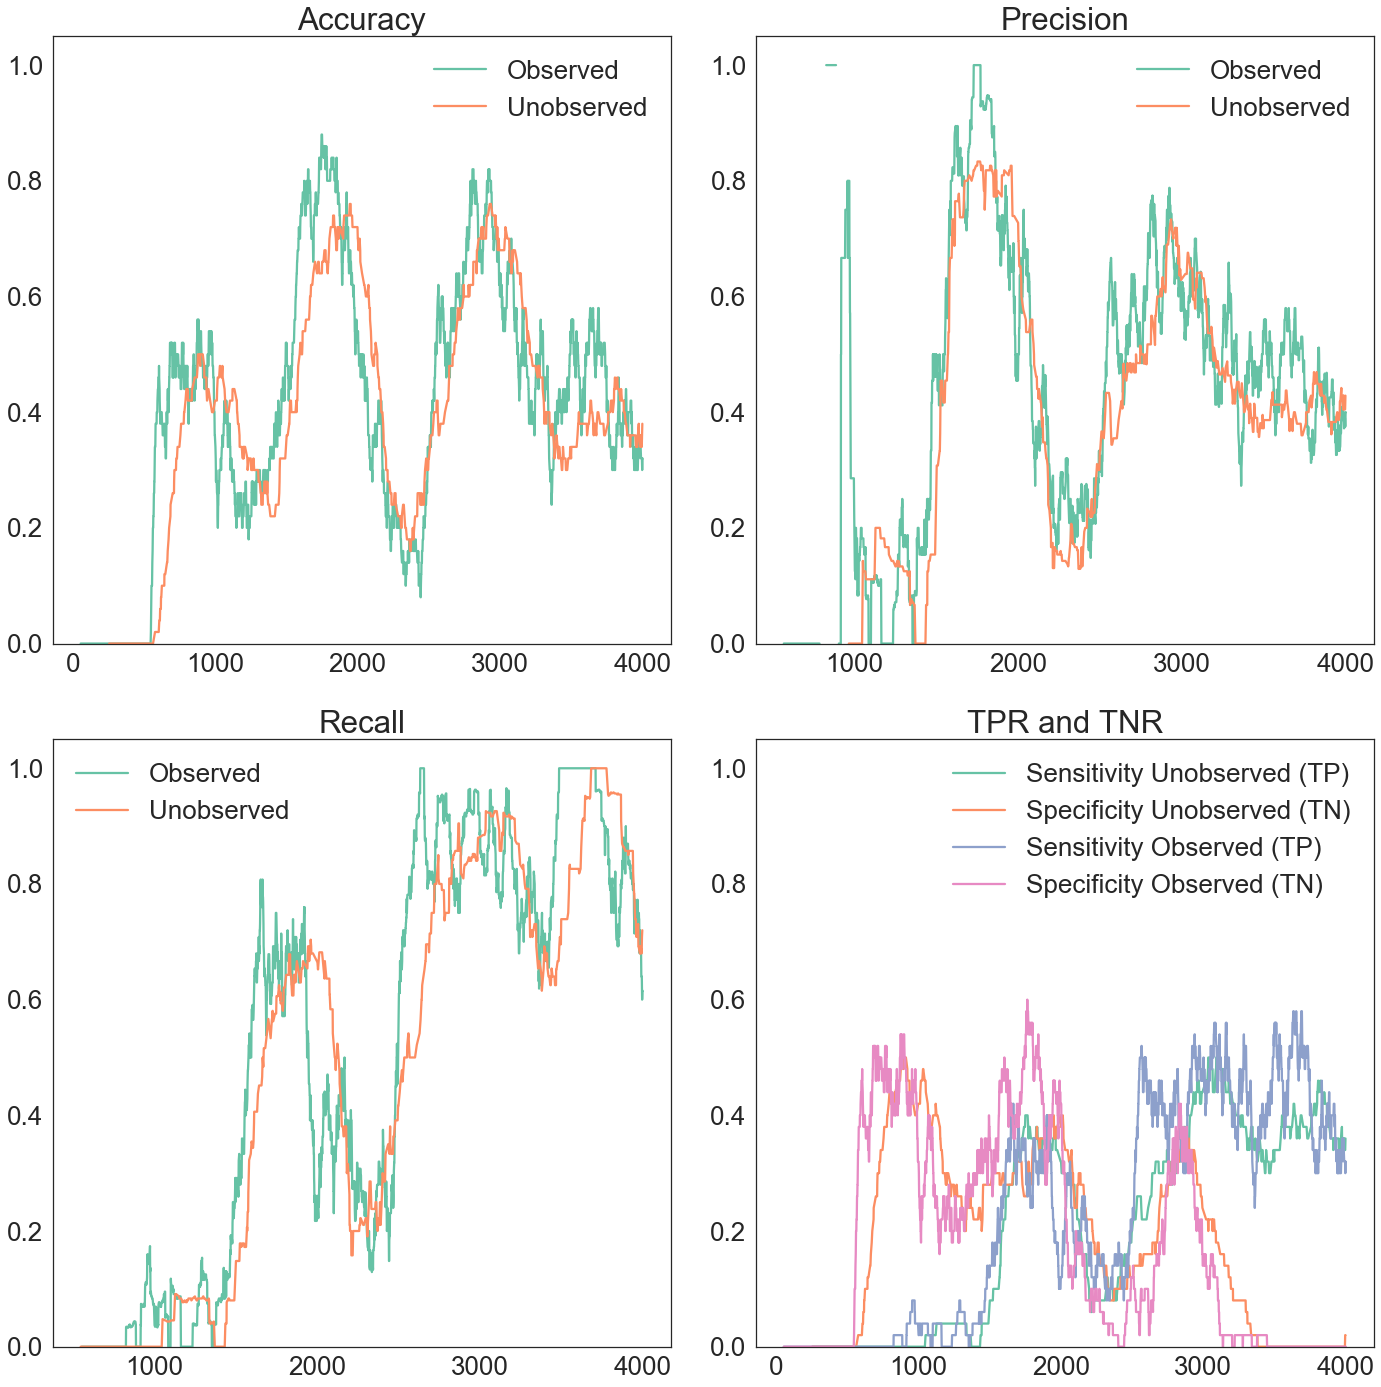

In [17]:
olac.vis.performance(eval_set, train_set, window=50)

## Comparing performance of online vs offline training

In [34]:
# -- using the roving balls dataset generator
# data_generator = olac.data_generators.roving_balls(steps=4000, radius=1)
data_generator = olac.data_generators.scaling_generator(
    olac.data_generators.cluster_generator(amount_of_labels=2, n_points=4000), 0, 1)
# -- using the multilayer perceptron classifier from sklearn
model = MLPClassifier((32,8,))
# -- using the online predictor algorithm
predictor = olac.pipeline.OnlinePredictor(verbose=False)
# -- using a simple threshold labeller
labeller = olac.pipeline.ThresholdLabeller(threshold=20, prob=0.8, verbose=False)

# -- Define the pipeline using the above defined elements
pipeline = olac.pipeline.Pipeline(data_generator=data_generator, 
                                  model=model,
                                  predictor=predictor,
                                  labeller=labeller)


In [35]:
eval_set, train_set = pipeline.run()

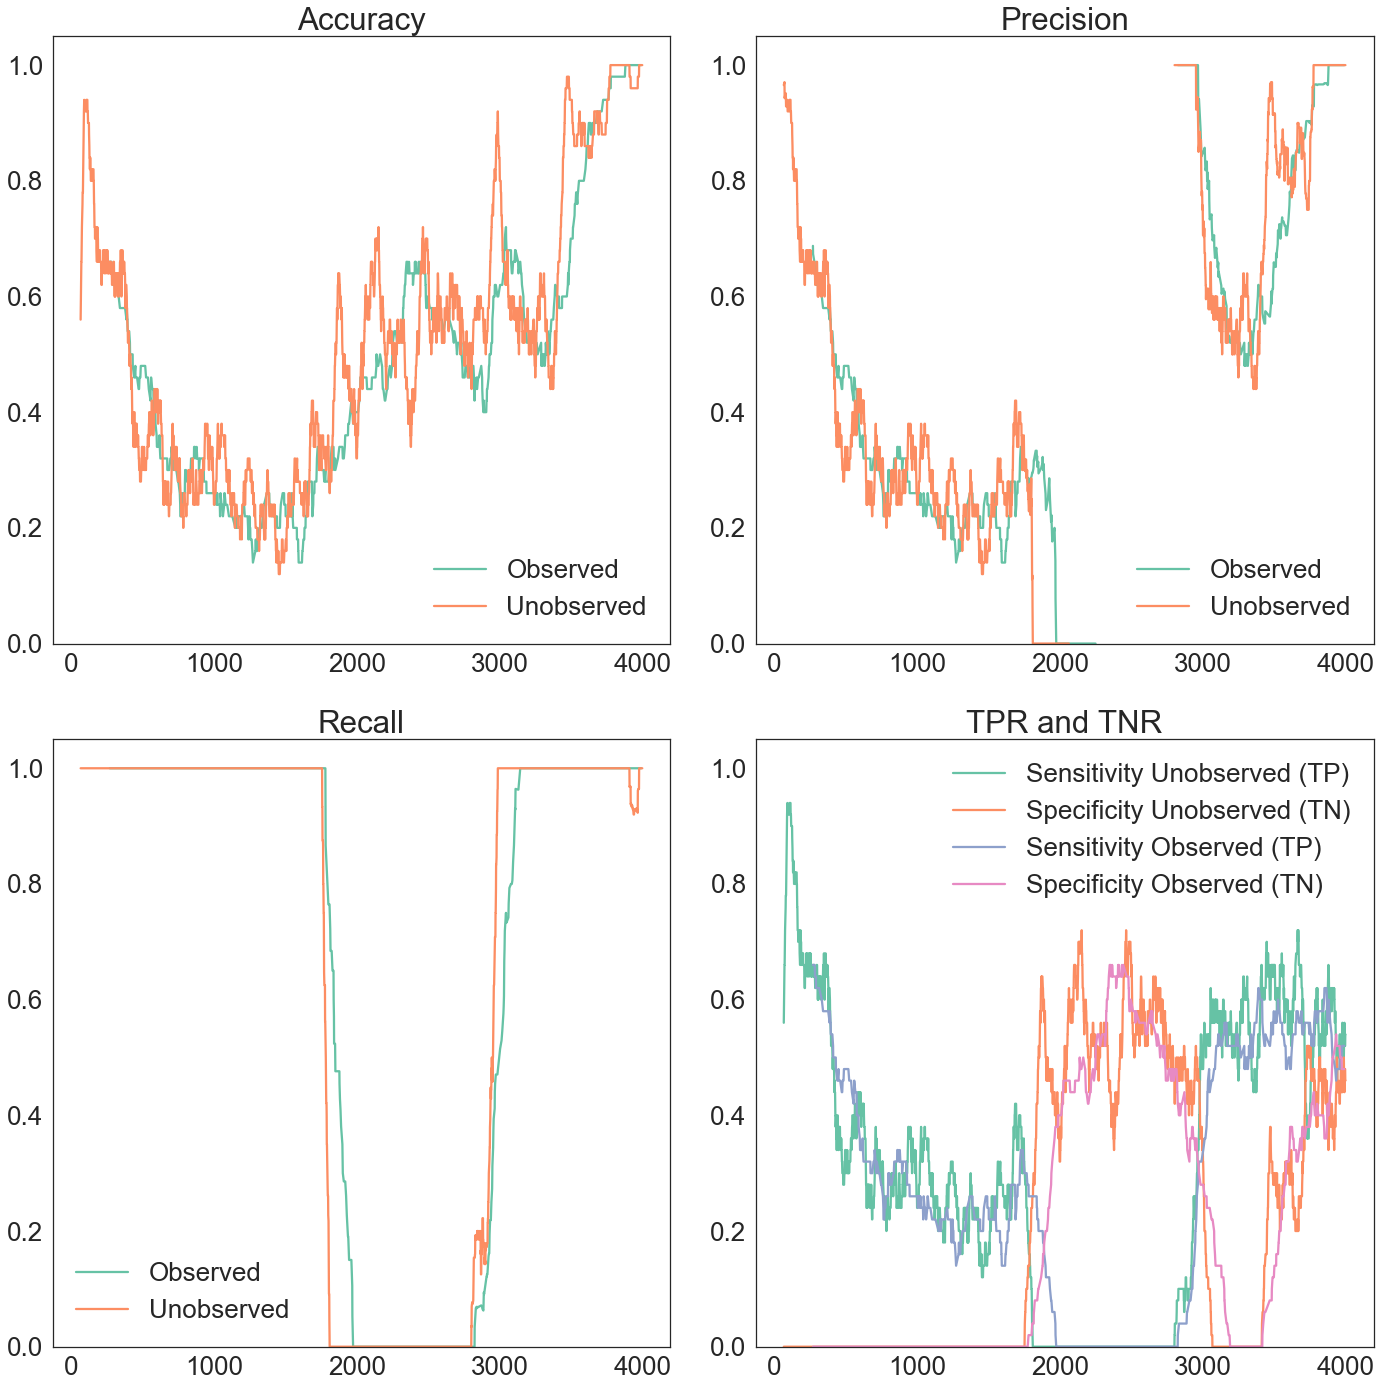

In [36]:
olac.vis.performance(eval_set, train_set, window=50)

In [37]:
# -- using the roving balls dataset generator
# data_generator = olac.data_generators.roving_balls(steps=4000, radius=1)
data_generator = olac.data_generators.scaling_generator(
    olac.data_generators.cluster_generator(amount_of_labels=2, n_points=4000), 0, 1)
# -- using the multilayer perceptron classifier from sklearn
model = MLPClassifier((32,8,))
# -- using the online predictor algorithm
predictor = olac.pipeline.OfflinePredictor(50)
# -- using a simple threshold labeller
labeller = olac.pipeline.ThresholdLabeller(threshold=20, prob=0.8, verbose=False)

# -- Define the pipeline using the above defined elements
pipeline = olac.pipeline.Pipeline(data_generator=data_generator, 
                                  model=model,
                                  predictor=predictor,
                                  labeller=labeller)


In [38]:
eval_set, train_set = pipeline.run()

Predictor:	109 new points available, re-training...
Trained model on 109 points
Predictor:	56 new points available, re-training...
Trained model on 165 points
Predictor:	82 new points available, re-training...
Trained model on 247 points
Predictor:	76 new points available, re-training...
Trained model on 323 points
Predictor:	69 new points available, re-training...
Trained model on 392 points
Predictor:	50 new points available, re-training...
Trained model on 442 points
Predictor:	61 new points available, re-training...
Trained model on 503 points
Predictor:	56 new points available, re-training...
Trained model on 559 points
Predictor:	52 new points available, re-training...
Trained model on 611 points
Predictor:	69 new points available, re-training...
Trained model on 680 points
Predictor:	59 new points available, re-training...
Trained model on 739 points
Predictor:	64 new points available, re-training...
Trained model on 803 points
Predictor:	62 new points available, re-training...


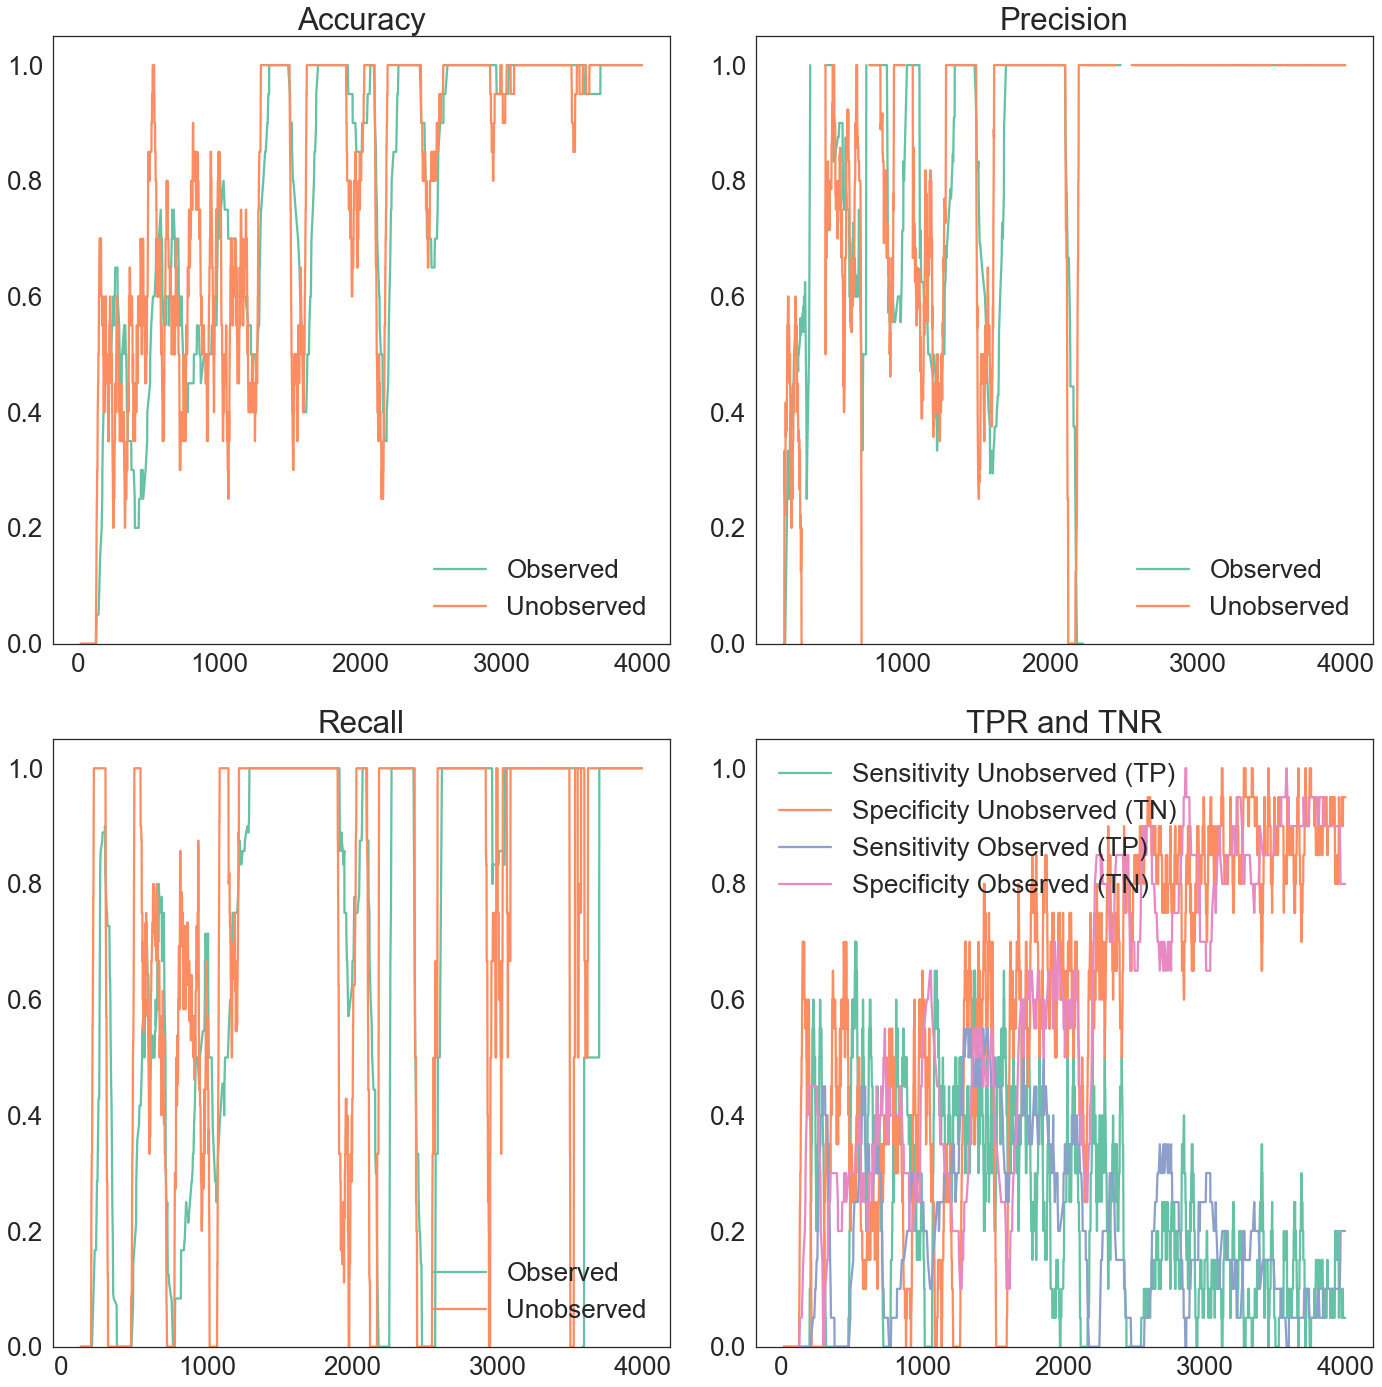

In [39]:
olac.vis.performance(eval_set, train_set, window=20)